In [ ]:
# Name: Sarah Sami
# Date: 1/12/2022
# Course: Applied Data Science - Reza Dibaj
# Desc: Assignment 4
# Student ID: 101334588

In [321]:
# 1.	Download the test.csv file and store it in a DataFrame named, myDF.
import pandas as pd
myDF = pd.read_csv('test.csv')

In [322]:
# 2.	Show the first three rows of the DF.
myDF.head(3)

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America


In [323]:
# 3.	Delete the ‘Model’ column from the DF TEMPORARILY. - not using assignment or inplace
myDF.drop('Model', axis=1)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
1,20,299,21,M,VNFKZD,[18$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
3,40,156,44,Q,RHRHJY,[89$],Asia
4,50,468,33,J,HPQCMC,[95$],Africa
...,...,...,...,...,...,...,...
945,9460,136,12,C,HGVBPV,[51$],South America
946,9470,316,46,L,SHBAUD,[33$],North America
947,9480,461,46,K,PUZUVO,[12$],Europe
948,9490,185,13,N,UMESZO,[39$],North America


In [324]:
# 4.	Delete the ‘Model’ column permanently, using the assignment (Not inplace parameter).
#  Is there any output when you run the permanent deletion? So, how can you make sure it is deleted?

myDF = myDF.drop('Model', axis=1)

In [325]:
# 4 - continued -  So, how can you make sure it is deleted?
myDF.head(3)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
1,20,299,21,M,VNFKZD,[18$],Asia
2,30,378,28,X,IMGMFY,[90$],North America


In [326]:
# 5.	Now, let’s delete rows 1, 3, and 5 permanently, using inplace. Then show the first 4 Rows of myDF.
myDF.drop([1,3,5], axis=0, inplace=True)
myDF.head(4)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
4,50,468,33,J,HPQCMC,[95$],Africa
6,70,327,24,F,NLVQPY,[25$],Europe


In [327]:
# 6.	Calculate the mean of ‘Range’ column.
myDF['Range'].mean()

297.53326293558604

In [328]:
# 7.	How many ‘F’ do we have in the ‘Type’ column? Replace them permanently with ‘AAA’ and show the first 5 rows.
myDF['Type'].value_counts()['F']

50

In [329]:
myDF['Type'].replace('F', 'AAA', inplace=True) # 7 continued

In [330]:
myDF.head(5) # 7 continued

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,[56$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
4,50,468,33,J,HPQCMC,[95$],Africa
6,70,327,24,AAA,NLVQPY,[25$],Europe
7,80,495,50,Z,DLUMAX,[70$],Antarctica


In [331]:
# 8.	Get rid of the '[' ',' '$'  ']' from the ‘Cost’ column permanently and display the first 5 rows. What is the type of ‘Cost’ column after this?
myDF['Cost'].replace('[\$\[\]]', '', regex=True, inplace=True)
myDF.head(5)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,56,Asia
2,30,378,28,X,IMGMFY,90,North America
4,50,468,33,J,HPQCMC,95,Africa
6,70,327,24,AAA,NLVQPY,25,Europe
7,80,495,50,Z,DLUMAX,70,Antarctica


In [332]:
# 8 continued - What is the type of ‘Cost’ column after this?
print(myDF['Cost'].dtype)

object


In [333]:
# 9.	Change the ‘Cost’ column data type to integer and display the result.
myDF['Cost'] = myDF['Cost'].astype(int)

In [334]:
print(myDF['Cost'].dtype) # 9 continued

int64


In [335]:
# 10.	Calculate the average of ‘Cost’ column. Then, calculate the average of ‘Cost’ for each ‘Continent’.

myDF['Cost'].mean()

54.586061246040124

In [336]:
myDF.groupby('Continent')['Cost'].mean() # 10 continued

Continent
Africa           54.741259
Antarctica       54.706897
Asia             54.279070
Australia        56.838028
Europe           53.258993
North America    55.006993
South America    53.162963
Name: Cost, dtype: float64

In [337]:
# 11.	Calculate the min, max and standard deviation of the ‘Cost’ column, group by each ‘Continent’, all in one command.
myDF.groupby('Continent')['Cost'].agg(['min', 'max', 'std'])

,min,max,std
Continent,,,
Africa,11,97,25.961432
Antarctica,10,97,24.880590
Asia,10,99,26.109737
Australia,10,97,26.057121
Europe,10,99,26.185054
North America,10,99,25.664821
South America,10,98,25.724780


In [338]:
# 12.	Calculate the min, max and standard deviation of all numerical columns, group by each ‘Continent’, all in one command.
import numpy as np
print(myDF.select_dtypes(include=np.number))

       ID  Range  Value  Cost
0      10    192     50    56
2      30    378     28    90
4      50    468     33    95
6      70    327     24    25
7      80    495     50    70
..    ...    ...    ...   ...
945  9460    136     12    51
946  9470    316     46    33
947  9480    461     46    12
948  9490    185     13    39
949  9500    137     10    10

[947 rows x 4 columns]


In [339]:
#12 continued - Calculate the min, max and standard deviation of ONLY (ID, Range, Value and Cost) columns, group by each ‘Continent’, all in one command.
myDF.groupby('Continent')[['ID', 'Range', 'Value', 'Cost']].agg(['min', 'max', 'std'])

ID                    Range                  Value      \
               min   max          std   min  max         std   min max   
Continent                                                                
Africa          50  9450  2614.387519   100  494  118.110406    10  50   
Antarctica      80  9370  2936.313786   106  495  114.401370    10  50   
Asia            10  9390  2683.431665   103  499  112.047425    10  50   
Australia      120  9410  2793.945560   104  496  116.374530    10  50   
Europe          70  9480  2623.991892   101  500  116.808685    10  50   
North America   30  9490  2841.216413   104  500  113.611333    11  50   
South America   90  9500  2656.186804   104  499  117.375623    10  50   

                         Cost                 
                     std  min max        std  
Continent                                     
Africa         12.498931   11  97  25.961432  
Antarctica     11.978316   10  97  24.880590  
Asia           11.752819   10  99  26.109737  
Australia      13.138226   10  97  26.057121  
Europe         11.999544   10  99  26.185054  
North America  12.319601   10  99  25.664821  
South America  11.762450   10  98  25.724780

<AxesSubplot:xlabel='Continent'>

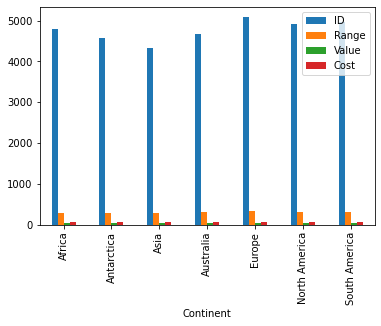

In [340]:
# 13.	Illustrate the mean of all numerical columns ONLY (ID, Range, Value and Cost), group by the ‘Continent’, using a ‘bar’ chart.
myDF.groupby('Continent')[['ID', 'Range', 'Value', 'Cost']].mean().plot(kind='bar')


In [341]:
# 14.	Count the number of each continent in the ‘Continent’ column. 
myDF['Continent'].value_counts()

North America    143
Africa           143
Australia        142
Europe           139
South America    135
Asia             129
Antarctica       116
Name: Continent, dtype: int64

In [343]:
# 15.	Show the percentage of each continent in the ‘Continent’ column. 
# concat a % sign to the end of each value
myDF['Continent'].value_counts(normalize=True).apply(lambda x: str(round(x*100, 2)) + '%')

North America     15.1%
Africa            15.1%
Australia        14.99%
Europe           14.68%
South America    14.26%
Asia             13.62%
Antarctica       12.25%
Name: Continent, dtype: object

In [344]:
# 16.	Show the unique values that we have in the ‘Continent’ column. Then show the number of unique values that we have in the ‘Continent’ column.
myDF['Continent'].unique()

array(['Asia', 'North America', 'Africa', 'Europe', 'Antarctica',
       'South America', 'Australia'], dtype=object)

In [345]:
# 16 continued - Then show the number of unique values that we have in the ‘Continent’ column.
myDF['Continent'].nunique()

7

In [346]:
# 17.	Use the value_count method for the ‘Cost’ column and describe the output as a comment in the next cell, using the # for the comment.
myDF['Cost'].value_counts()

56    20
35    20
73    18
54    17
97    17
      ..
18     5
94     5
22     5
42     3
24     2
Name: Cost, Length: 90, dtype: int64

In [132]:
# describing the above output - 17 continued
# The value_counts() method returns a series of the unique values in the column and the number of times they appear in the column.
# The output is sorted by the number of times the value appears in the column, from the highest to the lowest.
# Cost dtype is int64, so the output is sorted numerically. If the dtype was object, the output would be sorted alphabetically.

<AxesSubplot:ylabel='Frequency'>

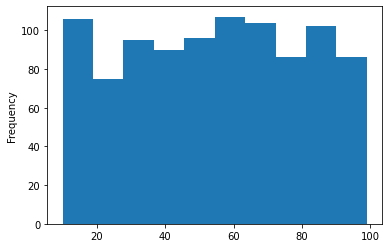

In [347]:
# 18.	Plot a histogram for the ‘Cost’ column. 
myDF['Cost'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

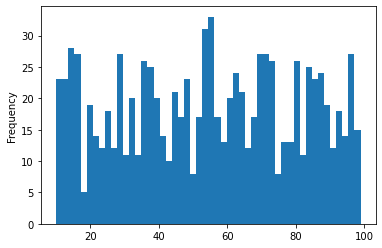

In [348]:
# 19.	Bonus question: Try to change the number of bins to 50 to show the result more accurately.
myDF['Cost'].plot(kind='hist', bins=50)

In [349]:
# 20.	How many missing values do we have in the ‘Zip Code’ column?
#  How many missing values in the ‘Type’ column? Provide a brief summary of null values for the entire Data Frame.
myDF['Zip Code'].isnull().sum()


9

In [350]:
# 20 continued - How many missing values in the ‘Type’ column? Provide a brief summary of null values for the entire Data Frame.
myDF['Type'].isnull().sum()

2

In [352]:
# 20 continued - Provide a brief summary of null values for the entire Data Frame.
myDF.isnull().sum()

ID           0
Range        0
Value        0
Type         2
Zip Code     9
Cost         0
Continent    0
dtype: int64

In [353]:
# 21.	If we drop all the rows that have ‘any’ missing value, how many rows will remain in myDF?
myDF.dropna().shape[0]

936

In [139]:
# 22.	Show the statistics for the ‘Type’ column using the value_count method, including the NaN values in the list. How many missing values do we have?
myDF['Type'].value_counts(dropna=False)


AAA    50
N      47
Q      45
Z      44
C      43
K      41
V      41
A      40
Y      39
H      39
X      38
G      38
M      38
O      36
U      36
L      35
J      35
S      34
I      33
W      32
D      30
B      29
T      28
P      28
R      25
E      24
NaN     2
Name: Type, dtype: int64

In [354]:
# 23.	Replace the ‘Type’ column missing values with ‘XXX’ and show the result again.
myDF['Type'].fillna('XXX', inplace=True)

In [355]:
myDF['Type'].value_counts(dropna=False) # 23 continued - show result

AAA    50
N      47
Z      44
Q      44
C      43
K      41
V      41
A      40
H      39
Y      39
G      38
M      37
X      37
U      36
O      36
L      35
J      35
S      34
I      33
W      32
D      30
B      29
T      28
P      28
R      25
E      24
XXX     2
Name: Type, dtype: int64

In [356]:
# 24.	Drop the rows that have any missing value permanently and show the number of rows after running the drop command.
myDF.dropna(inplace=True)

In [357]:
# 24 continued - show the number of rows after running the drop command.
myDF.shape[0]

938

In [358]:
# 25.	Set the ‘ID’ column as the new index and delete the index name.
# Then show the first 5 rows of the DF. Show the value of the cell that its ID is 70 and its column header is ‘Value’.

myDF.set_index('ID', inplace=True)

myDF.index.name = None

In [359]:
# 25 continued - Then show the first 5 rows of the DF. Show the value of the cell that its ID is 70 and its column header is ‘Value’.

myDF.head(5)

,Range,Value,Type,Zip Code,Cost,Continent
10,192,50,AAA,NXEYEM,56,Asia
30,378,28,X,IMGMFY,90,North America
50,468,33,J,HPQCMC,95,Africa
70,327,24,AAA,NLVQPY,25,Europe
80,495,50,Z,DLUMAX,70,Antarctica


In [360]:
# 25 continued - Show the value of the cell that its ID is 70 and its column header is ‘Value’.

myDF.loc[70, 'Value'] #using loc because ID is now the index

24

In [361]:
# 26. Show the index, columns and the shape of the current DF.
myDF.index


Int64Index([  10,   30,   50,   70,   80,   90,  100,  110,  120,  130,
            ...
            9410, 9420, 9430, 9440, 9450, 9460, 9470, 9480, 9490, 9500],
           dtype='int64', length=938)

In [362]:
# 26 continued - Show the index, columns and the shape of the current DF.
myDF.columns

Index(['Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object')

In [363]:
# 26 continued - Show the index, columns and the shape of the current DF.
myDF.shape


(938, 6)

In [364]:
# Bring back the ID column to the DF and reset the index. Again, show the index, columns and the shape of the current DF.
myDF.index.name = 'ID'
myDF.reset_index(inplace=True)

In [365]:
# 26 continued - Show the index, columns and the shape of the current DF.
myDF.index


RangeIndex(start=0, stop=938, step=1)

In [366]:
# 26 continued - Again, show the index, columns and the shape of the current DF.
myDF.columns

Index(['ID', 'Range', 'Value', 'Type', 'Zip Code', 'Cost', 'Continent'], dtype='object')

In [367]:
# 26 continued - Again, show the index, columns and the shape of the current DF.
myDF.shape

(938, 7)

In [368]:
# 27.	Show the first 5 rows of the DF.
myDF.head(5)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,56,Asia
1,30,378,28,X,IMGMFY,90,North America
2,50,468,33,J,HPQCMC,95,Africa
3,70,327,24,AAA,NLVQPY,25,Europe
4,80,495,50,Z,DLUMAX,70,Antarctica


In [369]:
# 27.	Use the describe method to see the statistics of myDF and fetch the value of the first row and the third column of the result.
myDF.describe()

,ID,Range,Value,Cost
count,938.000000,938.000000,938.000000,938.000000
mean,4749.104478,297.531983,29.917910,54.611940
std,2739.076928,115.913345,12.292447,25.742149
min,10.000000,100.000000,10.000000,10.000000
25%,2382.500000,194.000000,19.000000,33.000000
50%,4725.000000,295.000000,30.000000,55.000000
75%,7097.500000,400.000000,41.000000,76.000000
max,9500.000000,500.000000,50.000000,99.000000


In [370]:
# 27 continued - fetch the value of the first row and the third column of the result.
myDF.describe().iloc[0, 2] # 0 is the first row, 2 is the third column => count value

938.0

In [371]:
# 28.	Sort the value_counts() of the ‘Continent’ column of the DF. 
myDF['Continent'].value_counts().sort_values(ascending=True)

Antarctica       115
Asia             129
South America    135
Europe           138
Africa           139
North America    141
Australia        141
Name: Continent, dtype: int64

In [372]:
# Then, sort the value_counts() of the ‘Continent’ column, based on the alphabetic order of the continents.
myDF['Continent'].value_counts().sort_index()

Africa           139
Antarctica       115
Asia             129
Australia        141
Europe           138
North America    141
South America    135
Name: Continent, dtype: int64

In [373]:
# 29.	Show all the columns of the following rows in one command. ->  next code block: [1,3,5,7] and show the first 7 rows of the following columns: ‘Type’ and ‘Continent’
myDF.loc[[1,3,5,7], :]


,ID,Range,Value,Type,Zip Code,Cost,Continent
1,30,378,28,X,IMGMFY,90,North America
3,70,327,24,AAA,NLVQPY,25,Europe
5,90,115,30,S,KYJUHA,17,South America
7,110,301,29,A,OVINZU,69,South America


In [374]:
# 29 continued - show the first 7 rows of the following columns: ‘Type’ and ‘Continent’
myDF.loc[0:6, ['Type', 'Continent']]

,Type,Continent
0,AAA,Asia
1,X,North America
2,J,Africa
3,AAA,Europe
4,Z,Antarctica
5,S,South America
6,K,South America


In [375]:
# 30.	Show the ‘Value’ of the ‘Type’ that are equal to ’XXX’.
myDF[myDF['Type'] == 'XXX']['Value']

687    42
743    37
Name: Value, dtype: int64